In [113]:
import matplotlib.pyplot as plt
import pandas as pd

## Berkeley Earth

Website: https://berkeleyearth.org/data/

Data: https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_summary.txt

In [108]:
berkeley_df = pd.read_csv(
    'berkeley-earth_global_temperature.txt',
    header=56,
    sep='\s+',
)
drop_cols = [
    'Annual_Unc',
    'Five-year_Anomaly',
    'Five-year_Unc',
    'Annual_Anomaly.1',
    'Annual_Unc.1',
    'Five-year_Anomaly.1',
    'Five-year_Unc.1',
]
berkeley_df = berkeley_df.drop(drop_cols, axis=1)
berkeley_df = berkeley_df.set_index('Year')
berkeley_df = berkeley_df['Annual_Anomaly']
berkeley_baseline = berkeley_df.loc[1850:1900].mean()
berkeley_df = berkeley_df - berkeley_baseline

In [109]:
berkeley_df

Year
1850   -0.136941
1851   -0.021941
1852    0.005059
1853   -0.000941
1854    0.008059
          ...   
2019    1.333059
2020    1.358059
2021    1.204059
2022    1.246059
2023    1.538059
Name: Annual_Anomaly, Length: 174, dtype: float64

In [118]:
berkeley_running_mean = berkeley_df.rolling(20, center=True).mean()
berkeley_running_mean.index = berkeley_running_mean.index - 1

In [110]:
berkeley_df.loc[1985:2014].mean()

0.8325254901960785

In [111]:
berkeley_df.loc[1995:2014].mean()

0.9340588235294118

## HadCRUT5

Website: https://crudata.uea.ac.uk/cru/data/temperature/

Data: https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt

In [103]:
hadcrut5_df = pd.read_csv(
    'HadCRUT5_global.txt',
    sep='\s+',
)
hadcrut5_df = hadcrut5_df.iloc[::2, :]
hadcrut5_df = hadcrut5_df.set_index('year')
hadcrut5_df = hadcrut5_df['annual']
hadcrut5_baseline = hadcrut5_df.loc[1850:1900].mean()
hadcrut5_df = hadcrut5_df - hadcrut5_baseline

In [104]:
hadcrut5_df

year
1850   -0.061549
1851    0.123451
1852    0.127451
1853    0.086451
1854    0.064451
          ...   
2020    1.279451
2021    1.118451
2022    1.157451
2023    1.456451
2024    1.575451
Name: annual, Length: 175, dtype: float64

In [119]:
hadcrut5_running_mean = hadcrut5_df.rolling(20, center=True).mean()
hadcrut5_running_mean.index = hadcrut5_running_mean.index - 1

In [116]:
hadcrut5_df.loc[1985:2014].mean()

0.7682509803921568

In [117]:
hadcrut5_df.loc[1995:2014].mean()

0.8704009803921569

## NOAAGlobalTemp

Website: https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/

Data: https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/anomalies

In [128]:
noaa_df = pd.read_csv(
    'NOAAGlobalTemp_global.csv',
    header=4,
    sep=',',
)
noaa_df = noaa_df.set_index('Year')
noaa_df = noaa_df['Anomaly']
noaa_baseline = noaa_df.loc[1850:1900].mean()
noaa_df = noaa_df - noaa_baseline

In [129]:
noaa_df

Year
1850   -0.024118
1851    0.075882
1852    0.115882
1853    0.065882
1854    0.105882
          ...   
2019    1.155882
2020    1.195882
2021    1.045882
2022    1.075882
2023    1.365882
Name: Anomaly, Length: 174, dtype: float64

In [130]:
noaa_running_mean = noaa_df.rolling(20, center=True).mean()
noaa_running_mean.index = noaa_running_mean.index - 1

In [131]:
noaa_df.loc[1985:2014].mean()

0.67321568627451

In [132]:
noaa_df.loc[1995:2014].mean()

0.7663823529411766

## Comparison

See the "comparisons with other groups" section of the following report for a detailed discussion:  
https://berkeleyearth.org/global-temperature-report-for-2023/

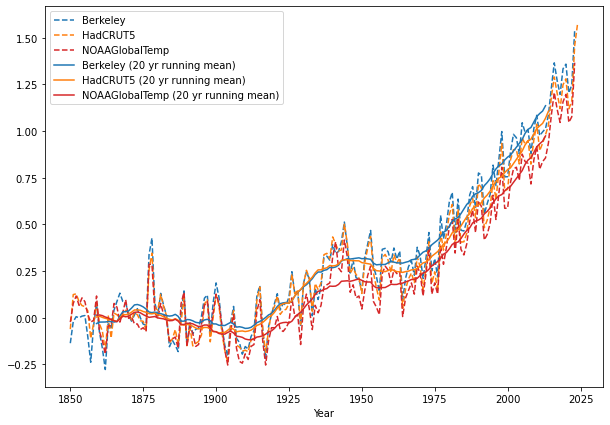

In [136]:
plt.figure(figsize=[10, 7])
berkeley_df.plot(label='Berkeley', color='tab:blue', linestyle='dashed')
hadcrut5_df.plot(label='HadCRUT5', color='tab:orange', linestyle='dashed')
noaa_df.plot(label='NOAAGlobalTemp', color='tab:red', linestyle='dashed')
berkeley_running_mean.plot(label='Berkeley (20 yr running mean)', color='tab:blue')
hadcrut5_running_mean.plot(label='HadCRUT5 (20 yr running mean)', color='tab:orange')
noaa_running_mean.plot(label='NOAAGlobalTemp (20 yr running mean)', color='tab:red')
plt.legend()
plt.show()